<a href="https://colab.research.google.com/github/esmaeilifardi/fashion_mnist_keras_ann/blob/main/fashion_mnist_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [20]:
(X_train, y_train), (X_test, y_test)  = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
X_train[1,]

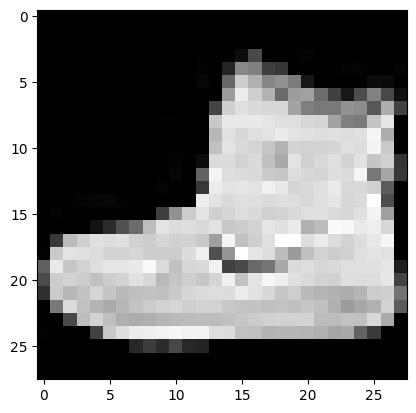

In [ ]:
plt.imshow(X_train[0,], cmap='gray')

In [21]:
X_train, X_test = X_train/255.0, X_test/255.0 #chone max 255 , min 0

In [ ]:
X_train[1,] #normal shode

In [ ]:
'''
#method A:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(25, keras.activations.relu))
model.add(keras.layers.Dense(15, keras.activations.relu))
model.add(keras.layers.Dense(10, keras.activations.softmax)) #chone multiclass
'''

In [22]:
#method B:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]), #or input_shape= X_train.shape[1:]
    keras.layers.Dense(100, keras.activations.relu),
    keras.layers.Dense(80, keras.activations.relu),
    keras.layers.Dense(10, keras.activations.softmax)
  ])

In [5]:
model.summary() 
#param = WI
#non_trainable = freezed

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 25)                19625     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers #list of layers

In [ ]:
model.layers[1] #list of layer a

In [ ]:
weights, biases = model.layers[1].get_weights() #list of layer 1 weights & biases

In [ ]:
weights

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
weights.shape # chone vorody 784 noron darad va laye badi 25 noron darad

(784, 25)

In [29]:
# method B:
'''
model.compile(
    optimizer = keras.optimizers.SGD() ,
    loss = keras.losses.sparse_categorical_crossentropy,
    metrics = [keras.metrics.sparse_categorical_accuracy]
)
'''

'\nmodel.compile(\n    optimizer = keras.optimizers.SGD() ,\n    loss = keras.losses.CategoricalCrossentropy,\n    metrics = [keras.metrics.sparse_categorical_accuracy]\n)\n'

In [23]:
# method A:

model.compile(
    optimizer = 'sgd',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [24]:
checkpoint_fashin_mnist = tf.keras.callbacks.ModelCheckpoint('fmn_model', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train , y_train,
                    epochs=50,
                    verbose='auto',
                    validation_split= 0.1,
                    callbacks=[checkpoint_fashin_mnist, early_stopping_cb])

Epoch 1/50
1688/1688 [==============================] - 9s 5ms/step - loss: 0.7864 - accuracy: 0.7388 - val_loss: 0.6011 - val_accuracy: 0.7913
Epoch 2/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.5171 - accuracy: 0.8196 - val_loss: 0.4816 - val_accuracy: 0.8327
Epoch 3/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4677 - accuracy: 0.8375 - val_loss: 0.4625 - val_accuracy: 0.8340
Epoch 4/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4384 - accuracy: 0.8471 - val_loss: 0.4174 - val_accuracy: 0.8488
Epoch 5/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4171 - accuracy: 0.8552 - val_loss: 0.4126 - val_accuracy: 0.8517
Epoch 6/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4014 - accuracy: 0.8601 - val_loss: 0.3969 - val_accuracy: 0.8563
Epoch 7/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3862 - accuracy: 0.8645 - val_loss: 0.4073 - val_accuracy:

In [25]:
#history.epoch
print(history.history)

{'loss': [0.786424458026886, 0.5171257257461548, 0.4676574766635895, 0.4384371042251587, 0.4170898497104645, 0.40139806270599365, 0.3861587941646576, 0.37543579936027527, 0.36472293734550476, 0.3539432883262634, 0.34577620029449463, 0.3370151221752167, 0.3305446207523346, 0.3229219913482666, 0.31804001331329346, 0.3109437823295593, 0.30593714118003845, 0.30066564679145813, 0.2953933775424957, 0.2910555601119995, 0.28706228733062744, 0.2826714515686035, 0.27799949049949646, 0.27382928133010864, 0.2699202001094818, 0.2665001451969147, 0.26255616545677185, 0.26005223393440247, 0.2569584250450134, 0.2529790997505188, 0.2504301369190216, 0.24696506559848785, 0.24460797011852264, 0.2410922646522522, 0.2377043515443802, 0.23552021384239197, 0.23238278925418854, 0.2290249615907669, 0.22644387185573578, 0.22464101016521454, 0.22188088297843933, 0.2188398689031601, 0.2160610556602478, 0.21294072270393372, 0.2107573002576828], 'accuracy': [0.7388148307800293, 0.8196296095848083, 0.837462961673736

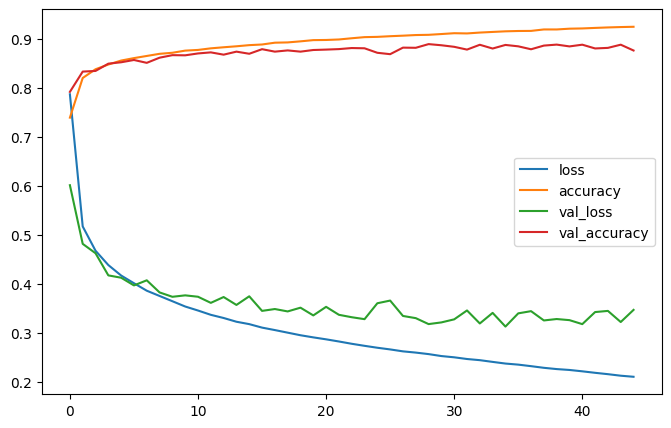

In [27]:
df = pd.DataFrame(history.history)
df.plot(figsize=(8, 5))
plt.gca().set_ylim(0, 1)
plt.show()

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3383 - accuracy: 0.8814


[0.3383416533470154, 0.8813999891281128]

In [30]:
x3 = X_test[1:3] #select 2 picture for manual test
x3.shape

(2, 28, 28)

In [ ]:
plt.imshow(x3[0])

In [ ]:
plt.imshow(x3[1])

In [36]:
y_pred = model.predict(x3).round(3) #3

1/1 [==============================] - 0s 18ms/step


In [41]:
np.argmax(y_pred, axis=1)

array([2, 1])

In [42]:
y_test[1:3]

array([2, 1], dtype=uint8)